In [22]:
from poincare import Simulator, System, Variable, Parameter, assign, initial
import numpy as np
import matplotlib.pyplot as plt 
import itertools as iter

In [3]:
class Pollnau(System):
    N0: Variable = initial(default=0)
    N1: Variable = initial(default=0)
    N2: Variable = initial(default=0)

    P: Parameter = assign(default=1)
    sigma0: Parameter = assign(default=1)
    sigma1: Parameter = assign(default=1)
    k1: Parameter = assign(default=1)
    k2: Parameter = assign(default=1)
    W1: Parameter = assign(default=1)

    n0 = N0.derive() << 0
    n1 = N1.derive() << sigma0 * N0 * P - k1 * N1 -2 * W1 * N1**2 - sigma1 * P * N1
    n2 = N2.derive() << - k2 * N2 + W1 * N1**2 + sigma1 * P * N1

In [4]:
def p_vs_i(pots, sim, **kwargs):
    n1, n2 = np.zeros_like(pots), np.zeros_like(pots)
    for i, pot in enumerate(pots):
        kwargs["model_params"][Pollnau.P] = pot
        res = sim.solve(save_at=kwargs["save_at"],
                        values=kwargs["model_params"])
        n1[i] = res["N1"].iloc[-1]
        n2[i] = res["N2"].iloc[-1]
    return n1, n2


In [53]:
sim = Simulator(Pollnau)
kwargs = {
    "model_params":{
        Pollnau.N0:1,
        Pollnau.N1:0,
        Pollnau.N2:0,
        Pollnau.P:1,
        Pollnau.sigma0:1,
        Pollnau.sigma1:1e0,
        Pollnau.k1:1e-1,
        Pollnau.k2:1e0,
        Pollnau.W1:1e1
    },
    "save_at":np.linspace(0, 10, 100)
}

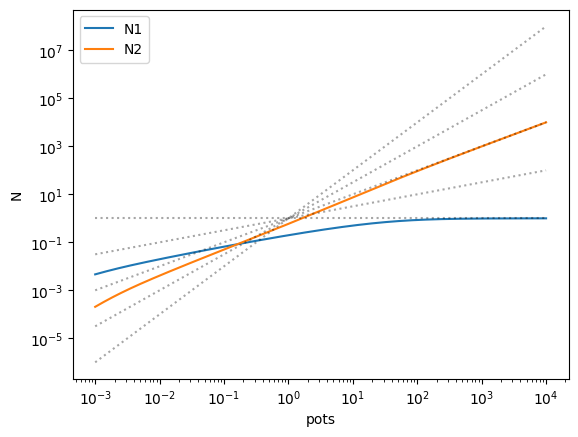

In [56]:
pots = np.geomspace(1e-3, 1e4, num=1000)
n1, n2 = p_vs_i(pots, sim, **kwargs)
sigma1 = kwargs["model_params"][Pollnau.sigma1]
k1 = kwargs["model_params"][Pollnau.k1]
W1 = kwargs["model_params"][Pollnau.W1]
plt.loglog(pots, n1, label="N1")
plt.loglog(pots, n2, label="N2")
[plt.loglog(pots, pots**n, alpha=0.35, color="k", linestyle="dotted",
            ) for n in (0, 1/2, 1, 3/2,2)]
plt.xlabel("pots")
plt.ylabel("N")
plt.legend()
plt.show()


In [ ]:
n1, n2 = p_vs_i(pots, sim, **kwargs)
plt.loglog(pots, n1)
plt.loglog(pots, n2)
plt.show()